In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
# Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Store PCA results in a DataFrame
df_pca = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])

C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kme

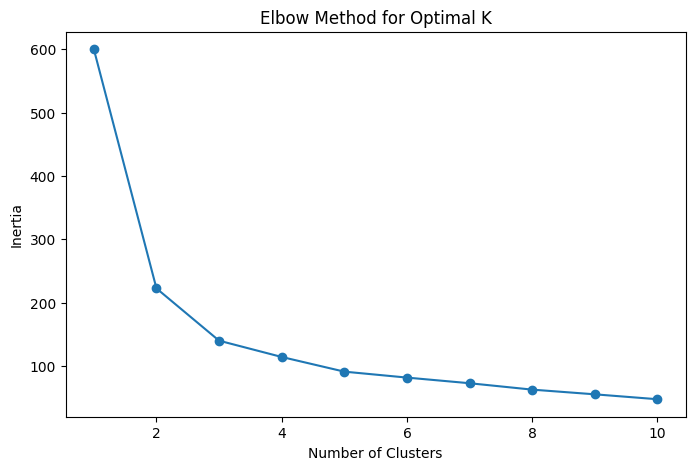

In [5]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [6]:
# From the Elbow Curve, choose an optimal number of clusters (e.g., k=3)
k_optimal = 3

# Apply K-Means with the chosen k
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the PCA DataFrame
df_pca['Cluster'] = clusters

C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


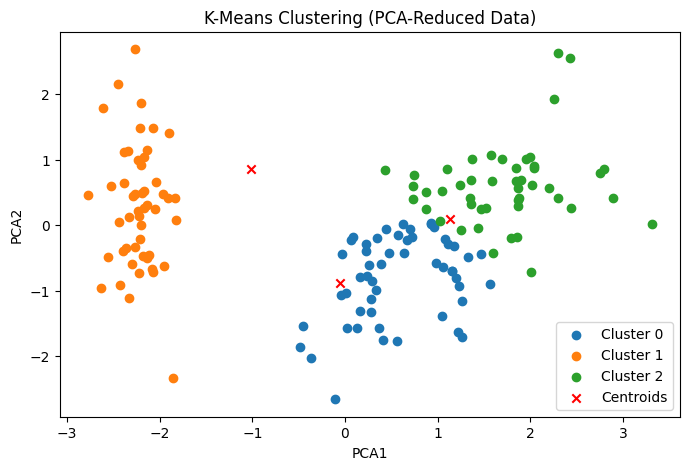

In [7]:
# Visualization of the clusters
plt.figure(figsize=(8, 5))
for cluster in range(k_optimal):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f"Cluster {cluster}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.title("K-Means Clustering (PCA-Reduced Data)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

In [8]:
# Evaluate the clustering using Silhouette Score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score for k={k_optimal}: {sil_score:.2f}")

Silhouette Score for k=3: 0.46
